In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("salary_data_cleaned.csv")

In [43]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Avg_Salary,Company_Txt,Job_State,Same_State,Age,Python_yn,Rstudio_yn,Spark_yn,Aws_yn,Excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\r\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\r\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\r\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\r\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\r\n,NY,1,22,1,0,0,0,1


In [44]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'Min_Salary', 'Max_Salary', 'Avg_Salary',
       'Company_Txt', 'Job_State', 'Same_State', 'Age', 'Python_yn',
       'Rstudio_yn', 'Spark_yn', 'Aws_yn', 'Excel_yn'],
      dtype='object')

In [45]:

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machiine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    
##Job Title and Seniority

##Fix State Los Angeles

##Job Description Length

##Competitor Count

## Hourly wage to annual

##Remove new line from job title


In [46]:
df['Job_Simp'] = df['Job Title'].apply(title_simplifier)

In [47]:
df.Job_Simp.value_counts()

data scientist    279
na                206
data engineer     119
analyst           102
manager            22
director           14
Name: Job_Simp, dtype: int64

In [48]:
df['Seniority'] = df['Job Title'].apply(seniority)

In [49]:
df.Seniority.value_counts()

na        520
senior    220
jr          2
Name: Seniority, dtype: int64

In [50]:
##Fix State Los Angeles

df['Job_State'] = df.Job_State.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

df.Job_State.value_counts()


CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
UT     10
WI     10
IN     10
MO      9
AZ      9
AL      8
MI      6
DE      6
KY      6
GA      6
CT      5
IA      5
NE      4
OR      4
LA      4
KS      3
NM      3
ID      2
MN      2
RI      1
SC      1
Name: Job_State, dtype: int64

In [51]:
#Job Description Length

df['Desc_Len'] = df['Job Description'].apply(lambda x: len(x)) 
df.Desc_Len

0       2555
1       4828
2       3495
3       3926
4       2748
5       3783
6       1808
7       3847
8       1561
9       4609
10      2789
11      3522
12      3980
13      4942
14      3799
15      1902
16      3676
17      4201
18      3549
19      4434
20      2944
21      6967
22      6472
23      2951
24      3806
25      3728
26      4452
27      4984
28      5057
29      3495
30      3926
31      3376
32      5126
33      2378
34      2187
35      1753
36      5044
37      3736
38      3602
39      1758
40      3079
41      2042
42      3872
43      3558
44      9165
45      3239
46      7325
47      3438
48      2730
49      2769
50      2953
51      4277
52      1649
53      4772
54      4495
55      3590
56      4244
57      5065
58      1808
59      3783
60      4852
61      1409
62      2962
63      4991
64      2527
65      1963
66      3123
67      8451
68      2352
69      2312
70      1902
71      2929
72      2703
73      4501
74      2651
75      4333
76      3437

In [52]:
#Competitor Count

df['Num_Comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)



In [53]:
df.Num_Comp

0      0
1      0
2      0
3      3
4      3
5      3
6      0
7      0
8      0
9      2
10     0
11     0
12     3
13     0
14     3
15     0
16     3
17     0
18     0
19     0
20     3
21     0
22     0
23     0
24     3
25     0
26     0
27     0
28     0
29     0
30     3
31     0
32     0
33     0
34     3
35     0
36     1
37     0
38     0
39     0
40     3
41     0
42     0
43     3
44     3
45     0
46     3
47     0
48     3
49     3
50     0
51     3
52     0
53     3
54     0
55     0
56     3
57     2
58     0
59     3
60     0
61     0
62     0
63     3
64     3
65     0
66     0
67     4
68     0
69     0
70     0
71     0
72     0
73     3
74     3
75     0
76     0
77     0
78     0
79     3
80     0
81     0
82     3
83     3
84     0
85     0
86     3
87     0
88     0
89     0
90     0
91     3
92     0
93     0
94     0
95     3
96     3
97     3
98     3
99     0
100    0
101    3
102    3
103    3
104    3
105    0
106    3
107    0
108    3
109    3
110    2
1

In [54]:
# Hourly wage to annual

df['Min_Salary'] = df.apply(lambda x: x.Min_Salary*2 if x.Hourly == 1 else x.Min_Salary, axis = 1)
df['Max_Salary'] = df.apply(lambda x: x.Max_Salary*2 if x.Hourly == 1 else x.Max_Salary, axis = 1)

In [55]:
df[df.Hourly ==1][['Hourly','Min_Salary','Max_Salary']]

,Hourly,Min_Salary,Max_Salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [56]:
df['Company_Txt'] = df.Company_Txt.apply(lambda x: x.replace('\r\n',''))

In [57]:
df['Company_Txt']

0                                      Tecolote Research
1                  University of Maryland Medical System
2                                                KnowBe4
3                                                   PNNL
4                                     Affinity Solutions
5                                               CyrusOne
6                                     ClearOne Advantage
7                                             Logic20/20
8                              Rochester Regional Health
9                                               <intent>
10                                                  Wish
11                                               ManTech
12                                               Walmart
13                                                Yesler
14                                Takeda Pharmaceuticals
15                                               Audible
16                                   Blueprint Medicines
17                             

<AxesSubplot:>

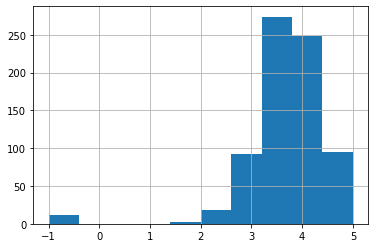

In [58]:
df.Rating.hist()

<AxesSubplot:>

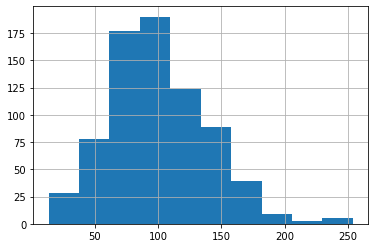

In [59]:
df.Avg_Salary.hist()

<AxesSubplot:>

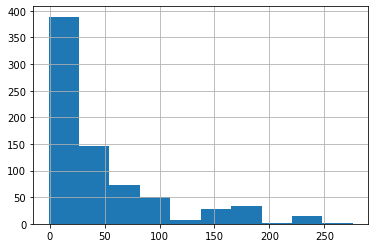

In [60]:
df.Age.hist()

<AxesSubplot:>

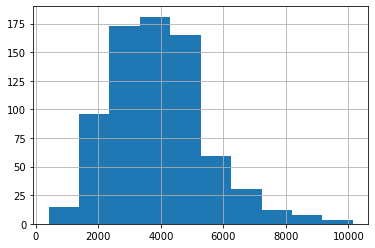

In [61]:
df.Desc_Len.hist()

<AxesSubplot:>

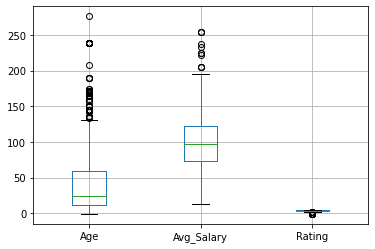

In [62]:
df.boxplot(column  =['Age','Avg_Salary','Rating'])

In [63]:
df[['Age','Avg_Salary','Rating','Desc_Len']].corr()

,Age,Avg_Salary,Rating,Desc_Len
Age,1.000000,0.019655,0.021655,0.165090
Avg_Salary,0.019655,1.000000,0.013492,0.078093
Rating,0.021655,0.013492,1.000000,-0.012631
Desc_Len,0.165090,0.078093,-0.012631,1.000000


<AxesSubplot:>

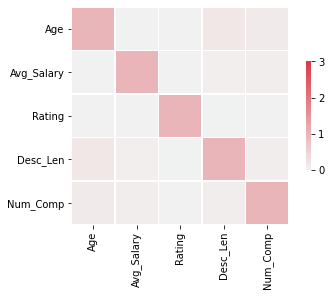

In [64]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['Age','Avg_Salary','Rating','Desc_Len','Num_Comp']].corr(),vmax = 3, center = 0, cmap= cmap,
           square = True, linewidths = .5, cbar_kws={"shrink":.5})

In [65]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'Min_Salary', 'Max_Salary', 'Avg_Salary',
       'Company_Txt', 'Job_State', 'Same_State', 'Age', 'Python_yn',
       'Rstudio_yn', 'Spark_yn', 'Aws_yn', 'Excel_yn', 'Job_Simp', 'Seniority',
       'Desc_Len', 'Num_Comp'],
      dtype='object')

In [66]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue','Company_Txt', 'Job_State', 'Same_State','Python_yn',
       'Rstudio_yn', 'Spark_yn', 'Aws_yn', 'Excel_yn', 'Job_Simp', 'Seniority']]

Graph for Location: total = 200


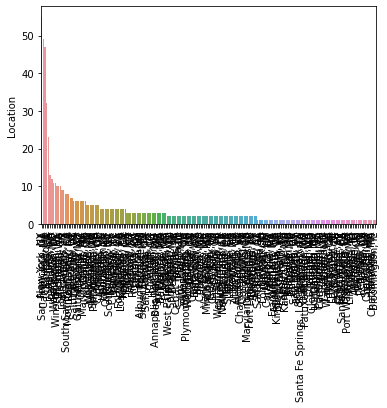

Graph for Headquarters: total = 198


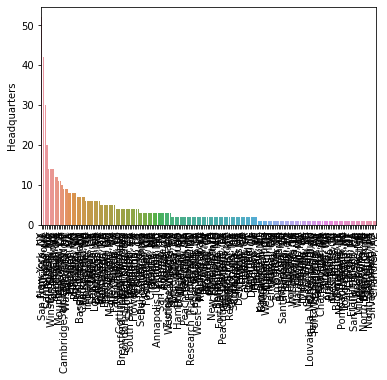

Graph for Size: total = 9


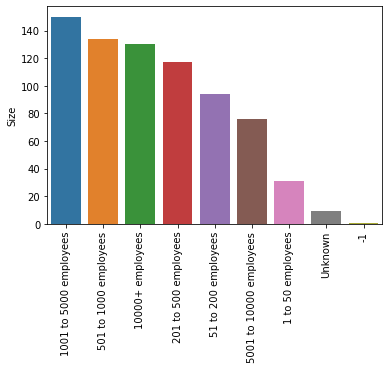

Graph for Type of ownership: total = 11


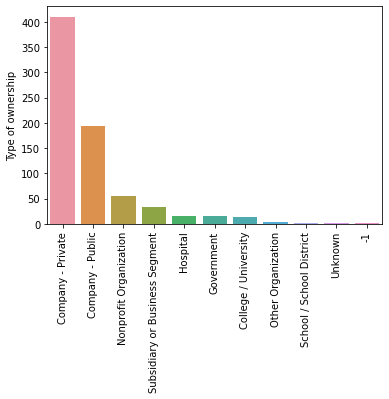

Graph for Industry: total = 60


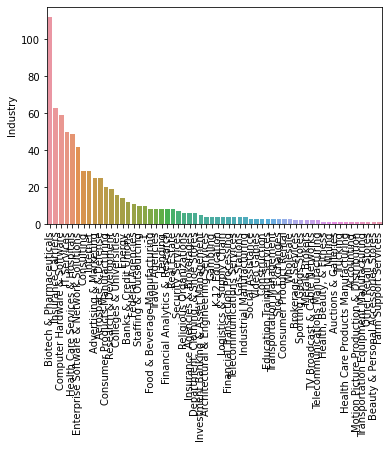

Graph for Sector: total = 25


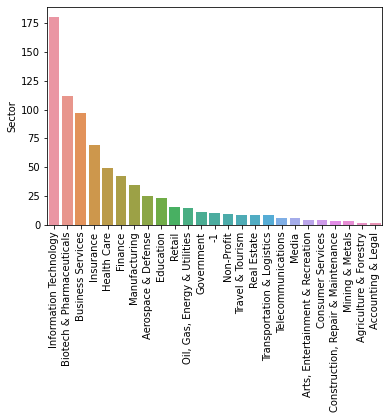

Graph for Revenue: total = 14


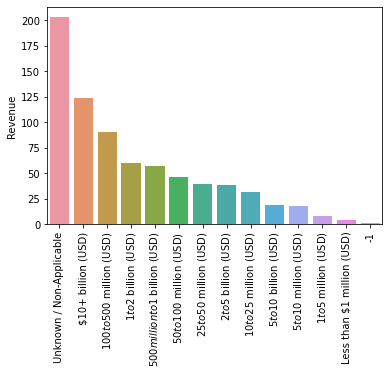

Graph for Company_Txt: total = 343


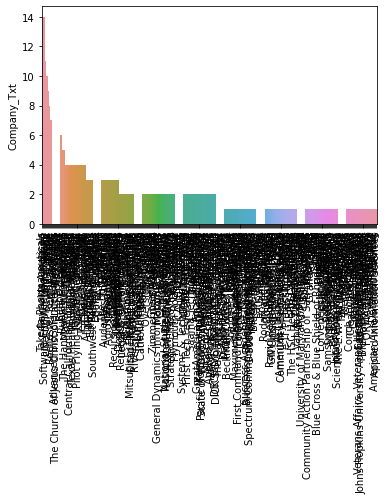

Graph for Job_State: total = 37


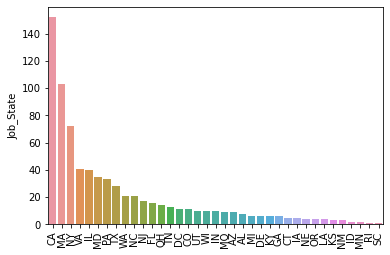

Graph for Same_State: total = 2


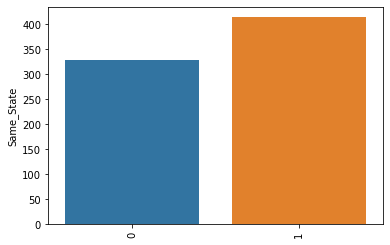

Graph for Python_yn: total = 2


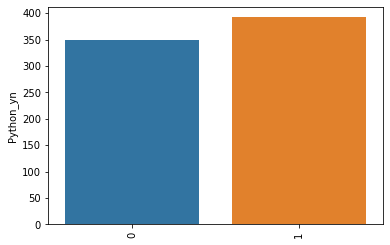

Graph for Rstudio_yn: total = 2


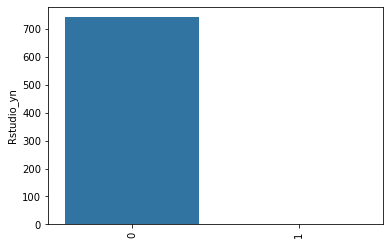

Graph for Spark_yn: total = 2


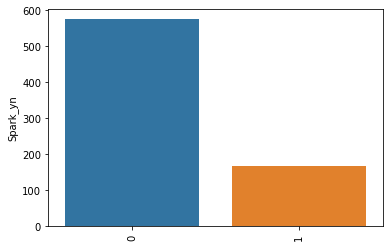

Graph for Aws_yn: total = 2


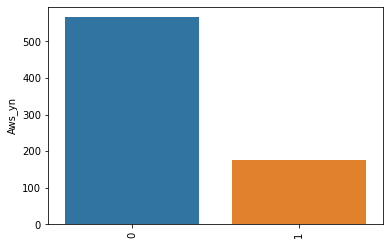

Graph for Excel_yn: total = 2


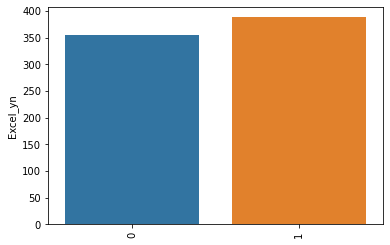

Graph for Job_Simp: total = 6


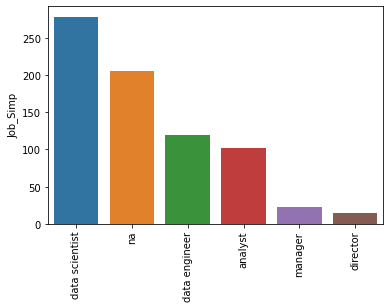

Graph for Seniority: total = 3


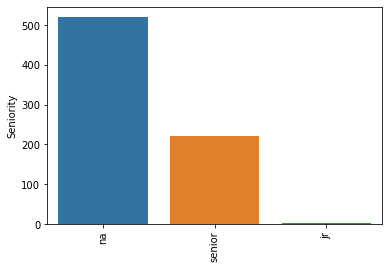

In [67]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s: total = %d' %(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

Graph for Location: total = 20


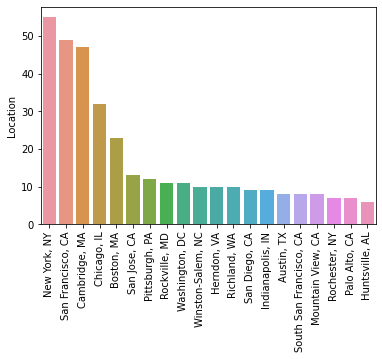

Graph for Headquarters: total = 20


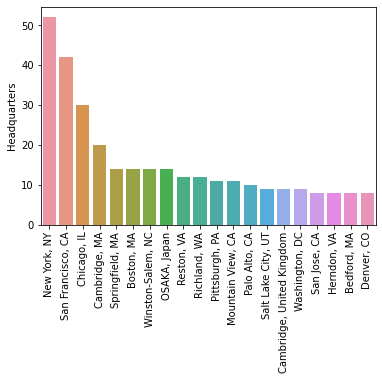

Graph for Company_Txt: total = 20


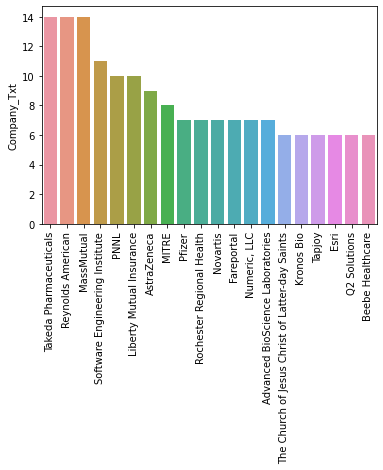

In [68]:
for i in df_cat[['Location','Headquarters','Company_Txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s: total = %d" %(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()
    

In [69]:
pd.pivot_table(df, index = 'Job_Simp', values = 'Avg_Salary')

,Avg_Salary
Job_Simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
na,89.293689


In [70]:
pd.pivot_table(df, index = ['Job_Simp','Seniority'], values = 'Avg_Salary')

Avg_Salary
Job_Simp       Seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
na             na          78.757042
               senior     112.671875

In [71]:
pd.pivot_table(df, index=['Job_State','Job_Simp'], values= 'Avg_Salary').sort_values('Job_State', ascending = False)

Avg_Salary
Job_State Job_Simp                  
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
          analyst          54.500000
VA        na               81.500000
          data scientist  108.416667
          data engineer    96.900000
          analyst          71.583333
UT        data engineer   100.333333
          analyst          54.750000
          data scientist  140.500000
TX        na               41.285714
          data scientist  100.730769
          data engineer   113.062500
TN        data scientist   96.000000
          data engineer   100.950000
          analyst          13.500000
SC        na               60.500000
RI        analyst         100.000000
PA        data scientist  113.333333
          data engineer    91.500000
          analyst          62.750000
          manager         109.666667
          na               96.800000
OR        data scientist   98.500000
          data engineer    73.000000
OH        na               91.166667
          data scientist  105.285714
          analyst          53.875000
NY        na               87.785714
          data scientist  115.250000
          data engineer    86.375000
          analyst          65.607143
NM        data scientist   74.333333
NJ        data scientist  106.875000
          analyst          83.583333
          data engineer   112.000000
          manager         109.500000
          director        161.500000
          na               82.500000
NE        na               41.000000
NC        na               90.916667
          data scientist  117.000000
          data engineer   104.250000
MO        na               72.333333
          manager          40.500000
          data scientist  127.666667
          analyst          61.000000
MN        data engineer    95.000000
          analyst          76.000000
MI        manager          87.500000
          data scientist  106.625000
MD        na               88.750000
          data scientist  109.115385
          data engineer   109.000000
          analyst          80.666667
MA        na              107.478261
          manager          71.900000
          director        117.833333
          data scientist  113.750000
          data engineer   107.291667
          analyst          59.125000
LA        analyst          48.000000
          data engineer    70.500000
          na               20.000000
KY        na              103.500000
          data scientist   84.000000
KS        na               87.000000
IN        na               69.000000
          data scientist   84.500000
          data engineer   114.500000
IL        analyst          66.500000
          na               76.125000
          director        221.750000
          data scientist  117.233333
          data engineer    96.125000
ID        analyst          56.250000
IA        analyst          43.000000
          data engineer   102.833333
GA        data scientist   81.333333
          na               80.000000
FL        data scientist   97.357143
          data engineer    91.833333
          analyst          47.500000
DE        na               27.500000
DC        data scientist  149.000000
          data engineer    85.000000
          analyst          63.500000
CT        data scientist   84.000000
          na               62.500000
CO        data engineer    99.000000
          analyst          29.500000
          na               48.750000
          data scientist  108.666667
CA        na              112.000000
          manager          80.611111
          data scientist  142.522059
          data engineer   129.540000
          analyst          85.250000
AZ        data scientist   69.500000
          data engineer    79.500000
          analyst          55.000000
          na              124.500000
AL        na               43.750000
          data engineer    65.

In [72]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [73]:
pd.pivot_table(df, index=['Job_State','Job_Simp'], values= 'Avg_Salary').sort_values('Job_State', ascending = False)

Avg_Salary
Job_State Job_Simp                  
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
          analyst          54.500000
VA        na               81.500000
          data scientist  108.416667
          data engineer    96.900000
          analyst          71.583333
UT        data engineer   100.333333
          analyst          54.750000
          data scientist  140.500000
TX        na               41.285714
          data scientist  100.730769
          data engineer   113.062500
TN        data scientist   96.000000
          data engineer   100.950000
          analyst          13.500000
SC        na               60.500000
RI        analyst         100.000000
PA        data scientist  113.333333
          data engineer    91.500000
          analyst          62.750000
          manager         109.666667
          na               96.800000
OR        data scientist   98.500000
          data engineer    73.000000
OH        na               91.166667
          data scientist  105.285714
          analyst          53.875000
NY        na               87.785714
          data scientist  115.250000
          data engineer    86.375000
          analyst          65.607143
NM        data scientist   74.333333
NJ        data scientist  106.875000
          analyst          83.583333
          data engineer   112.000000
          manager         109.500000
          director        161.500000
          na               82.500000
NE        na               41.000000
NC        na               90.916667
          data scientist  117.000000
          data engineer   104.250000
MO        na               72.333333
          manager          40.500000
          data scientist  127.666667
          analyst          61.000000
MN        data engineer    95.000000
          analyst          76.000000
MI        manager          87.500000
          data scientist  106.625000
MD        na               88.750000
          data scientist  109.115385
          data engineer   109.000000
          analyst          80.666667
MA        na              107.478261
          manager          71.900000
          director        117.833333
          data scientist  113.750000
          data engineer   107.291667
          analyst          59.125000
LA        analyst          48.000000
          data engineer    70.500000
          na               20.000000
KY        na              103.500000
          data scientist   84.000000
KS        na               87.000000
IN        na               69.000000
          data scientist   84.500000
          data engineer   114.500000
IL        analyst          66.500000
          na               76.125000
          director        221.750000
          data scientist  117.233333
          data engineer    96.125000
ID        analyst          56.250000
IA        analyst          43.000000
          data engineer   102.833333
GA        data scientist   81.333333
          na               80.000000
FL        data scientist   97.357143
          data engineer    91.833333
          analyst          47.500000
DE        na               27.500000
DC        data scientist  149.000000
          data engineer    85.000000
          analyst          63.500000
CT        data scientist   84.000000
          na               62.500000
CO        data engineer    99.000000
          analyst          29.500000
          na               48.750000
          data scientist  108.666667
CA        na              112.000000
          manager          80.611111
          data scientist  142.522059
          data engineer   129.540000
          analyst          85.250000
AZ        data scientist   69.500000
          data engineer    79.500000
          analyst          55.000000
          na              124.500000
AL        na               43.750000
          data engineer    65.

In [74]:
pd.pivot_table(df, index=['Job_State','Job_Simp'], values= 'Avg_Salary', aggfunc = 'count').sort_values('Job_State', ascending = False)

Avg_Salary
Job_State Job_Simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       7
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        data scientist           6
          data engineer            1
          analyst                  8
          manager                  3
          na                      15
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      14
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        na                       3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       8
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        data scientist           2
          na                       3
CO        data engineer            3
          analyst                  1
          na                       4
          data scientist           3
CA        na                      32
          manager                  9
          data scientist          68
          data engineer           25
          analyst                 18
AZ        data scientist           1
          data engineer            5
          analyst                  1
          na                       2
AL        na                       2
          data engineer       

In [75]:
pd.pivot_table(df[df.Job_Simp == 'data scientist'], index=['Job_State'], values= 'Avg_Salary').sort_values('Avg_Salary', ascending = False)

,Avg_Salary
Job_State,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [76]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'Min_Salary', 'Max_Salary', 'Avg_Salary',
       'Company_Txt', 'Job_State', 'Same_State', 'Age', 'Python_yn',
       'Rstudio_yn', 'Spark_yn', 'Aws_yn', 'Excel_yn', 'Job_Simp', 'Seniority',
       'Desc_Len', 'Num_Comp'],
      dtype='object')

In [77]:
#Salary x Rating, Industry, Sector, Revenue, Numberof Comp, Hourly, Employer provided, python, R , 
#Spark, AWS, Excel, Desc_Len, Type of ownership

df_pivots= df[['Rating','Industry','Sector', 'Revenue', 'Num_Comp','Employer Provided', 'Python_yn',
       'Rstudio_yn', 'Spark_yn', 'Aws_yn', 'Excel_yn','Type of ownership','Avg_Salary']]

In [78]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values = 'Avg_Salary').sort_values('Avg_Salary',ascending = False))

Rating
        Avg_Salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          Avg_Salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'Avg_Salary' not 1-dimensional

In [79]:
pd.pivot_table(df_pivots,index = 'Revenue', columns = 'Python_yn', values = 'Avg_Salary', aggfunc = 'count')

Python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [82]:
df.to_csv("eda_data.csv", index = False)